# EE7204 -Computer Vision and Image Processing 

## Take Home Assignment 1 - EG/2020/4360

#### Load and Display the Image

In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image loaded successfully.


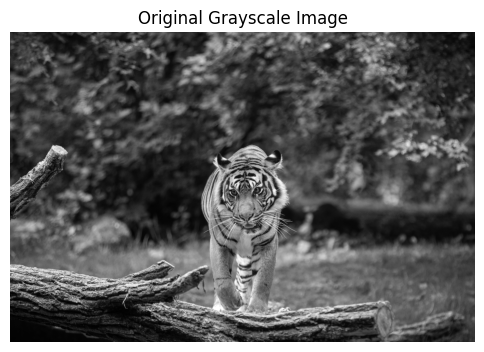

In [2]:
# Load the image in grayscale mode
image = cv2.imread('Image.jpg', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded properly
if image is None:
    print("Image not found.")
else:
    print("Image loaded successfully.")

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

cv2.imwrite('OriginalGrayscaleImage.png',image );

## Task 1: Reduce the Number of Intensity Levels in the Image

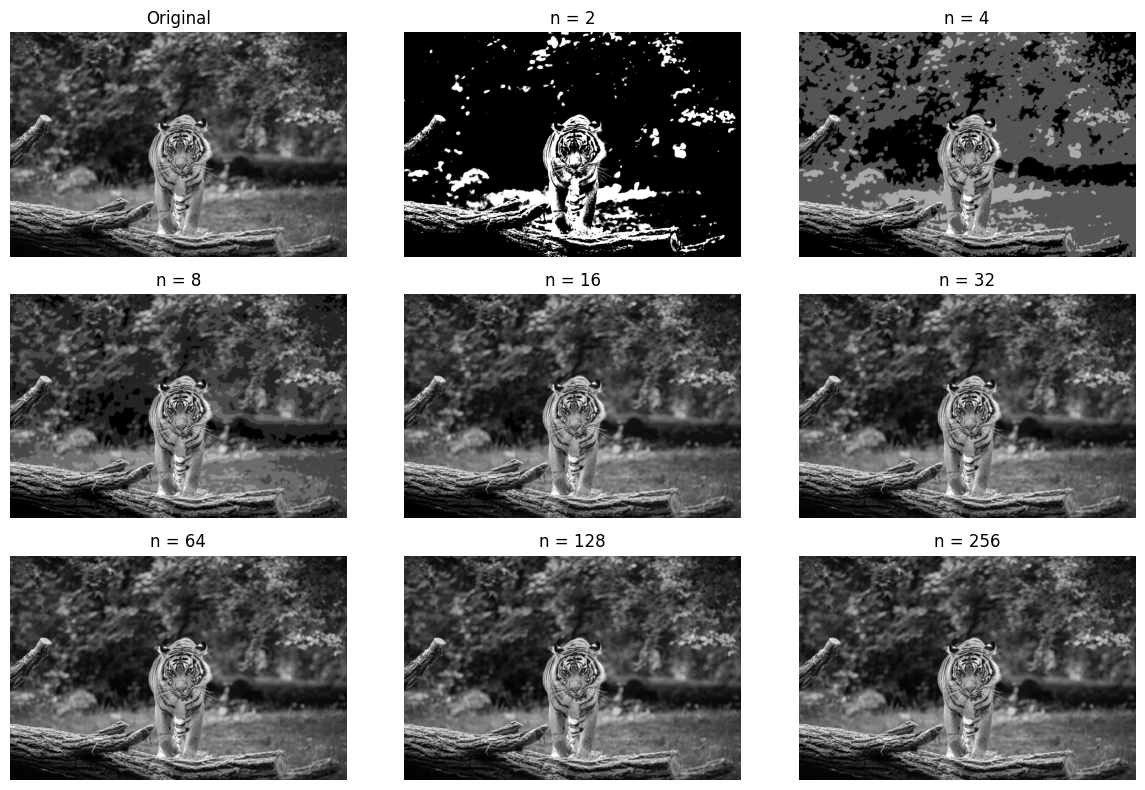

In [3]:
def reduce_intensity_levels(image, n):
    """ Reduce image intensity levels to n levels (power of 2)."""
    
    img_float = image.astype(np.float32) / 255.0         # normalize to 0–1
    idx = np.round(img_float * (n - 1)).astype(np.int32) # scale to (n-1) and round
    reduced = (idx * 255.0 / (n - 1)).astype(np.uint8)    # scale back to 0–255
    return reduced

# Define different levels
n_values = [2, 4, 8, 16, 32, 64, 128, 256]

# Plot images
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, n in enumerate(n_values, 2):
    reduced = reduce_intensity_levels(image, n)
    plt.subplot(3, 3, i)
    plt.imshow(reduced, cmap='gray')
    plt.title(f'n = {n}')
    plt.axis('off')
    
    # Save the output
    cv2.imwrite(f'reduced_{n}.png', reduced)

plt.tight_layout()
plt.show()


## Task 2 : Apply Spatial Averaging


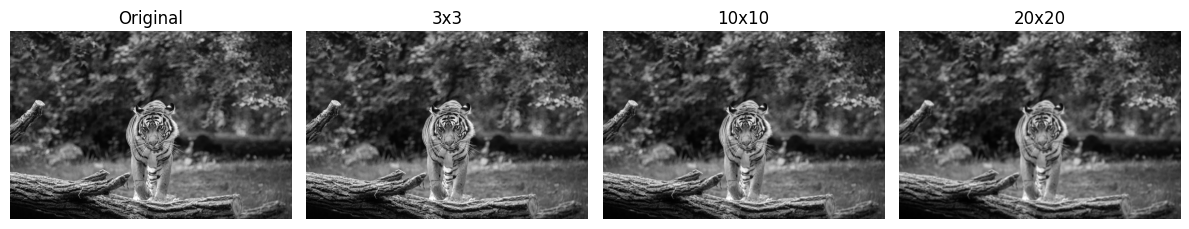

In [4]:
kernel_sizes = [3, 10, 20]

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

# Apply blurring for each kernel size
for i, k in enumerate(kernel_sizes, start=2):
    blurred = cv2.blur(image, (k, k))
    plt.subplot(1, 4, i)
    plt.imshow(blurred, cmap='gray')
    plt.title(f'{k}x{k}')
    plt.axis('off')

    # Save the blurred image
    cv2.imwrite(f'blurred_{k}x{k}.png', blurred)

plt.tight_layout()
plt.show()


## Task 3: Rotate Image by 90° and 45°

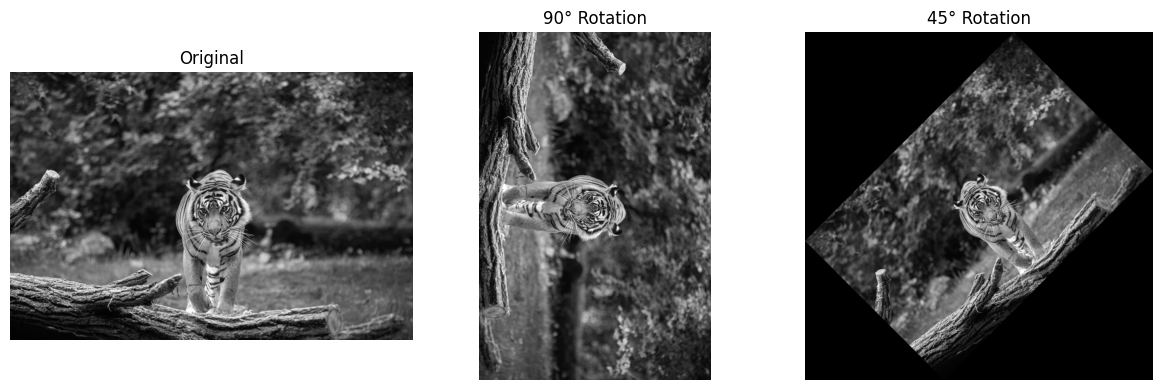

In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

# Rotate 90 degrees clockwise
rotated_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
plt.subplot(1, 3, 2)
plt.imshow(rotated_90, cmap='gray')
plt.title('90° Rotation')
plt.axis('off')
cv2.imwrite('rotated_90.png', rotated_90)

# Rotate 45 degrees 
(h, w) = image.shape
center = (w // 2, h // 2)

# Get rotation matrix for 45 degrees
M = cv2.getRotationMatrix2D(center, 45, 1.0)

# Compute new bounding dimensions
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))

M[0, 2] += (new_w / 2) - center[0]
M[1, 2] += (new_h / 2) - center[1]

# Rotate and display
rotated_45 = cv2.warpAffine(image, M, (new_w, new_h))
plt.subplot(1, 3, 3)
plt.imshow(rotated_45, cmap='gray')
plt.title('45° Rotation')
plt.axis('off')
cv2.imwrite('rotated_45.png', rotated_45)

plt.tight_layout()
plt.show()


## Task 4: Reduce Spatial Resolution Using Block Averaging

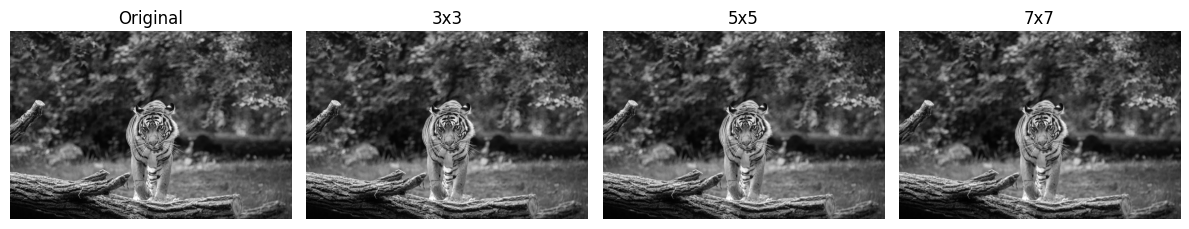

In [6]:
def block_average(image, block_size):
    
    """Replace non-overlapping blocks in the image with their average value."""
    
    result = image.copy()
    h, w = image.shape
    
    for i in range(0, h - block_size + 1, block_size):
        for j in range(0, w - block_size + 1, block_size):
            block = image[i:i+block_size, j:j+block_size]
            avg = np.round(np.mean(block)).astype(np.uint8)
            result[i:i+block_size, j:j+block_size] = avg
            
    return result

# Define block sizes
block_sizes = [3, 5, 7]

# Plot original and block-averaged images
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, b in enumerate(block_sizes, start=2):
    averaged = block_average(image, b)
    plt.subplot(1, 4, i)
    plt.imshow(averaged, cmap='gray')
    plt.title(f'{b}x{b}')
    plt.axis('off')
    
    # Save result
    cv2.imwrite(f'block_averaged_{b}x{b}.png', averaged)

plt.tight_layout()
plt.show()
